# Proposito del Proyecto

# Iniciacion

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

## 1.2 Cargar datos

In [2]:
hipotesis = pd.read_csv("hypotheses_us.csv", sep=";")
ordenes = pd.read_csv("orders_us.csv", sep=",")
visitantes = pd.read_csv("visits_us.csv", sep=",")

#/datasets/

## 1.3 Preparar los datos

In [3]:
def info_gral(datos):
    print("------Primeras Filas------")
    print(datos.head())
    print()
    print("------Datos Generales------")
    print(datos.info())
    print()
    print("------Revision de Datos Ausentes------")
    print(datos.isna().sum())
    print()
    print("------Revision de Duplicados------")
    print(datos.duplicated().sum())
    print()
    print("------Valores Faltantes------")

## 1.4 Limpieza de Datos

In [4]:
info_gral(hipotesis)

------Primeras Filas------
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      

In [5]:
info_gral(ordenes)

------Primeras Filas------
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

------Revision de Datos Ausentes------
transactionId    0
visitorId        0
date             0
revenue          0
group     

In [6]:
ordenes['date']= pd.to_datetime(ordenes['date'])

In [7]:
info_gral(visitantes)

------Primeras Filas------
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

------Revision de Datos Ausentes------
date      0
group     0
visits    0
dtype: int64

------Revision de Duplicados------
0

------Valores Faltantes------


In [8]:
visitantes['date']= pd.to_datetime(visitantes['date'])

## 1.5 Priorizar hipótesis

In [9]:
hipotesis['ICE']= hipotesis['Impact']*hipotesis['Confidence'] / hipotesis['Effort']
ICE_prioridad = hipotesis.sort_values('ICE', ascending=False)
ICE_prioridad


,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [10]:
hipotesis['RICE']= hipotesis['Reach']*hipotesis['Impact']*hipotesis['Confidence'] / hipotesis['Effort']
RICE_prioridad = hipotesis.sort_values('RICE', ascending=False)
RICE_prioridad

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [11]:
hipotesis['Hypothesis'][2]

"Add product recommendation blocks to the store's site. This will increase conversion and average purchase size"

### El mayor ICE score:

Representa la prioridad más alta. Este es el elemento que tiene el mejor equilibrio entre alto impacto, alta confianza y bajo esfuerzo.
los tres con mayor prioridad son los que estan en el indice como #8 #0 y #7 

### El mayor RICE score:

La iniciativa más prioritaria. es #7 #2 y #0
Ya que tiene el mejor balance entre:
Alcanzar a un gran número de personas,
Generar un impacto significativo,
Contar con alta confianza en los resultados esperados,
Y requerir un esfuerzo moderado o bajo.




### La Hipótesis 2 ("Add product recommendation blocks to the store's site. This will increase conversion and average purchase size") es la mejor opción para un análisis A/B:

Tiene el mayor RICE Score (112.0).

Afecta a un alto número de usuarios (Reach = 10).

Tiene un impacto significativo (Impact = 7) y alta confianza (Confidence = 8).

El esfuerzo es razonable (Effort = 5) para su beneficio esperado.

Además, probar cambios como formularios en páginas clave es medible fácilmente en un A/B test, lo que asegura resultados claros y accionables

## Análisis del test A/B

In [12]:
ordenes.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
visitantes.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
fechas_grupos = visitantes[['date','group']].drop_duplicates()
fechas_grupos

,date,group
0,2019-08-01,A
1,2019-08-02,A
2,2019-08-03,A
3,2019-08-04,A
4,2019-08-05,A
...,...,...
57,2019-08-27,B
58,2019-08-28,B
59,2019-08-29,B
60,2019-08-30,B


In [15]:
ordene_acumuladas = fechas_grupos.apply(
    lambda fila:
    ordenes[np.logical_and(ordenes['date'] <= fila['date'], ordenes['group'] == fila['group'])].agg({
        'date':'max',
        'group': 'max',
        'transactionId': 'nunique',
        'visitorId' : 'nunique',
        'revenue': 'sum'
        
    }),axis=1
    ).sort_values(by=['date','group'])

ordene_acumuladas.columns = ['date','group','n_transaction','n_client','acumulative_revenue']
ordene_acumuladas.head()

,date,group,n_transaction,n_client,acumulative_revenue
0,2019-08-01,A,24,20,2356.8
31,2019-08-01,B,21,20,1620.0
1,2019-08-02,A,44,38,3860.3
32,2019-08-02,B,45,43,4243.8
2,2019-08-03,A,68,62,5675.5


In [16]:
visitas_acumuladas = fechas_grupos.apply(
    lambda fila:
    visitantes[np.logical_and(visitantes['date'] <= fila['date'], visitantes['group'] == fila['group'])].agg({
        'date':'max',
        'group': 'max',
        'visits': 'sum'
        
    }),axis=1
    ).sort_values(by=['date','group'])

visitas_acumuladas.columns = ['date','group','acumulative_visits']
visitas_acumuladas.head()

,date,group,acumulative_visits
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845


In [17]:
datos_acumulados= pd.merge(visitas_acumuladas ,ordene_acumuladas,on=['date','group'] )
datos_acumulados

,date,group,acumulative_visits,n_transaction,n_client,acumulative_revenue
0,2019-08-01,A,719,24,20,2356.8
1,2019-08-01,B,713,21,20,1620.0
2,2019-08-02,A,1338,44,38,3860.3
3,2019-08-02,B,1294,45,43,4243.8
4,2019-08-03,A,1845,68,62,5675.5
...,...,...,...,...,...,...
57,2019-08-29,B,17708,596,544,87343.0
58,2019-08-30,A,18037,545,493,63563.5
59,2019-08-30,B,18198,620,567,90736.3
60,2019-08-31,A,18736,557,503,64554.9


### 1. Representa gráficamente el ingreso acumulado por grupo.

In [31]:
rentabilidad_acumulada_A = datos_acumulados.query('group == "A"') [['date','group','acumulative_revenue']]
rentabilidad_acumulada_B = datos_acumulados.query('group == "B"') [['date','group','acumulative_revenue']]
print(rentabilidad_acumulada_A)
print(rentabilidad_acumulada_B)


         date group  acumulative_revenue
0  2019-08-01     A               2356.8
2  2019-08-02     A               3860.3
4  2019-08-03     A               5675.5
6  2019-08-04     A               6822.1
8  2019-08-05     A               8810.2
10 2019-08-06     A               9600.0
12 2019-08-07     A              11842.9
14 2019-08-08     A              13373.3
16 2019-08-09     A              16320.4
18 2019-08-10     A              19608.6
20 2019-08-11     A              20838.3
22 2019-08-12     A              24749.1
24 2019-08-13     A              28846.0
26 2019-08-14     A              29910.8
28 2019-08-15     A              31319.0
30 2019-08-16     A              32918.1
32 2019-08-17     A              33723.6
34 2019-08-18     A              34895.4
36 2019-08-19     A              37884.5
38 2019-08-20     A              39116.8
40 2019-08-21     A              41872.3
42 2019-08-22     A              43655.6
44 2019-08-23     A              45543.6
46 2019-08-24   

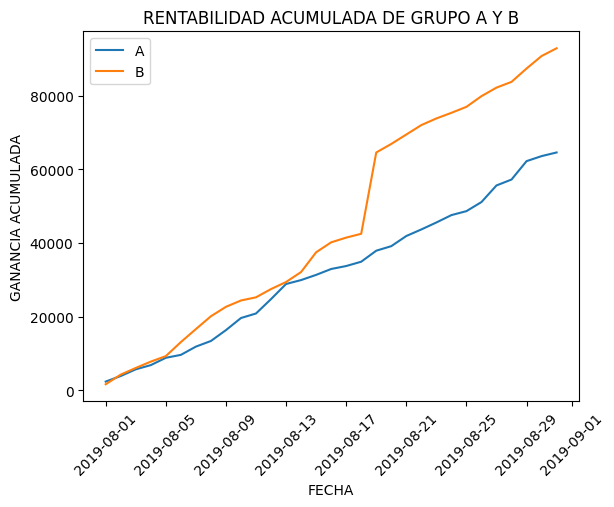

In [54]:
plt.plot(rentabilidad_acumulada_A['date'], rentabilidad_acumulada_A['acumulative_revenue'],label='A')
plt.plot(rentabilidad_acumulada_B['date'], rentabilidad_acumulada_B['acumulative_revenue'],label='B') 
plt.xlabel('FECHA')
plt.ylabel('GANANCIA ACUMULADA')
plt.title('RENTABILIDAD ACUMULADA DE GRUPO A Y B')
plt.xticks(rotation=45)


plt.legend()

plt.show()

A simple vista el grupo A es la principal y la prueba que se puso fue la de grupo B y a simple vista se ve que las ventas an aumentado aunque para estar mas seguro seria hacer una prueba test A/B.

### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo.

In [ ]:
# Calcular el acumulado de transacciones para cada grupo
promedio_transaction_A = datos_acumulados.query('group == "A"')[['date','group','n_transaction']]
promedio_transaction_B = datos_acumulados.query('group == "B"')[['date','group','n_transaction']]

print(promedio_transaction_A)
print(promedio_transaction_B)


         date group  n_transaction
0  2019-08-01     A             24
2  2019-08-02     A             44
4  2019-08-03     A             68
6  2019-08-04     A             84
8  2019-08-05     A            109
10 2019-08-06     A            127
12 2019-08-07     A            145
14 2019-08-08     A            161
16 2019-08-09     A            177
18 2019-08-10     A            193
20 2019-08-11     A            206
22 2019-08-12     A            230
24 2019-08-13     A            244
26 2019-08-14     A            268
28 2019-08-15     A            283
30 2019-08-16     A            301
32 2019-08-17     A            311
34 2019-08-18     A            328
36 2019-08-19     A            350
38 2019-08-20     A            362
40 2019-08-21     A            385
42 2019-08-22     A            401
44 2019-08-23     A            426
46 2019-08-24     A            441
48 2019-08-25     A            451
50 2019-08-26     A            467
52 2019-08-27     A            495
54 2019-08-28     A 

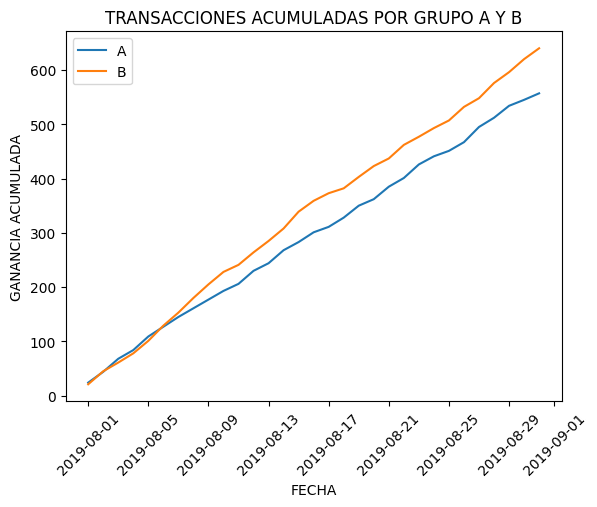

In [64]:
plt.plot(promedio_transaction_A['date'], promedio_transaction_A['n_transaction'],label='A')
plt.plot(promedio_transaction_B['date'], promedio_transaction_B['n_transaction'],label='B') 
plt.xlabel('FECHA')
plt.ylabel('GANANCIA ACUMULADA')
plt.title('TRANSACCIONES ACUMULADAS POR GRUPO A Y B')
plt.xticks(rotation=45)


plt.legend()

plt.show()

A simple vista graficamente se ve que el grupo B tiene mejores ganancias con el tiempo.

### 3.Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

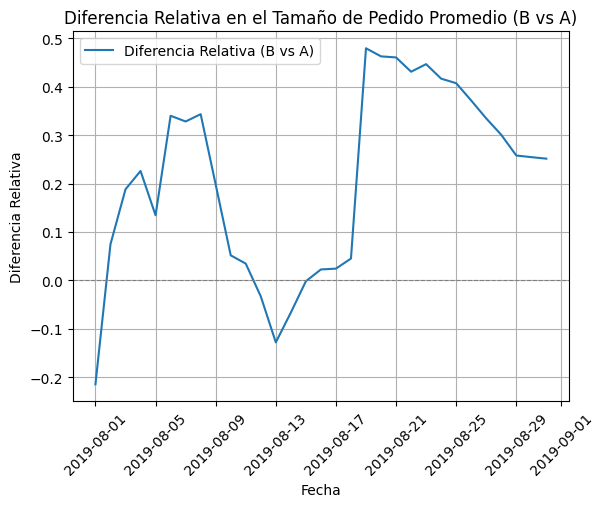

In [67]:
# Calcular el tamaño de pedido promedio acumulado para cada grupo
datos_acumulados['average_order_size'] = datos_acumulados['acumulative_revenue'] / datos_acumulados['n_transaction']

# Separar datos por grupo
grupo_A = datos_acumulados[datos_acumulados['group'] == 'A']
grupo_B = datos_acumulados[datos_acumulados['group'] == 'B']

# Calcular la diferencia relativa
diferencia_relativa = pd.merge(
    grupo_A[['date', 'average_order_size']],
    grupo_B[['date', 'average_order_size']],
    on='date',
    suffixes=('_A', '_B')
)

diferencia_relativa['relative_difference'] = (
    (diferencia_relativa['average_order_size_B'] - diferencia_relativa['average_order_size_A'])
    / diferencia_relativa['average_order_size_A']
)

# Graficar la diferencia relativa
plt.plot(diferencia_relativa['date'], diferencia_relativa['relative_difference'], label='Diferencia Relativa (B vs A)')

# Configuración del gráfico
plt.title("Diferencia Relativa en el Tamaño de Pedido Promedio (B vs A)")
plt.xlabel("Fecha")
plt.ylabel("Diferencia Relativa")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea de referencia en 0
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


En general, el grupo B tiene un mejor desempeño en términos de tamaño de pedido promedio acumulado, lo que indica una estrategia más efectiva para aumentar el valor por pedido.
Los picos negativos señalan áreas donde el grupo A tiene un mejor desempeño momentáneo. Esto podría ser una oportunidad para investigar y aprender qué factores contribuyeron al éxito del grupo A en esos momentos específicos.
Se debería analizar más a fondo la causa de las fluctuaciones (positivas y negativas) para ajustar las estrategias y optimizar el rendimiento del grupo B.


### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. 

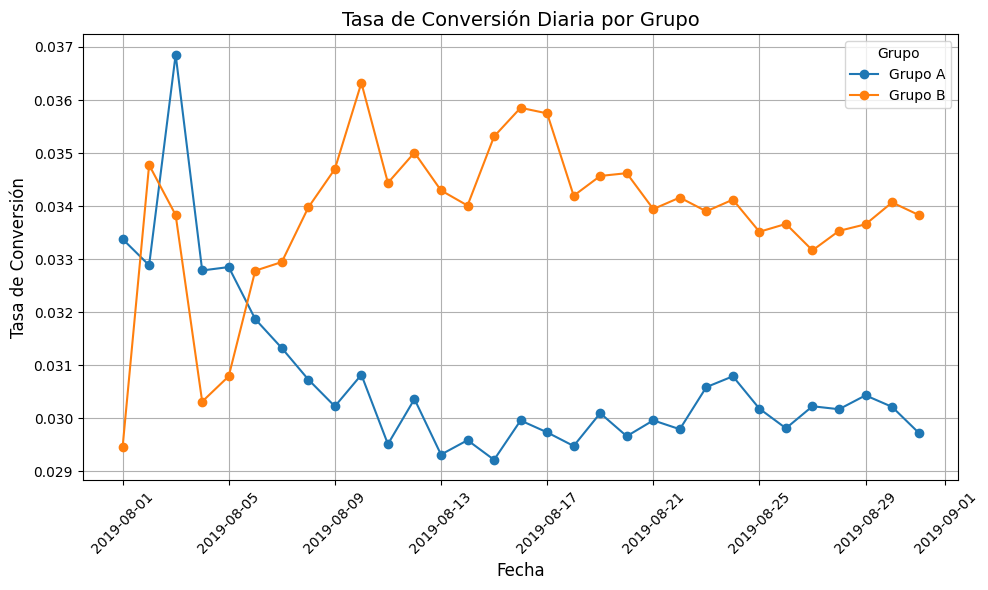

In [111]:
# Cálculo de la tasa de conversión diaria
datos_acumulados['conversion_rate'] = datos_acumulados['n_transaction'] / datos_acumulados['acumulative_visits']

# Separar los datos por grupo
conversion_grupo_A = datos_acumulados[datos_acumulados['group'] == 'A']
conversion_grupo_B = datos_acumulados[datos_acumulados['group'] == 'B']

# Representación gráfica de las tasas de conversión diarias
plt.figure(figsize=(10, 6))
plt.plot(conversion_grupo_A['date'], conversion_grupo_A['conversion_rate'], label='Grupo A', marker='o')
plt.plot(conversion_grupo_B['date'], conversion_grupo_B['conversion_rate'], label='Grupo B', marker='o')

# Personalización del gráfico
plt.title('Tasa de Conversión Diaria por Grupo', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.legend(title='Grupo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Grupo B tiene una tasa de conversión consistentemente mayor:

A lo largo del tiempo, la tasa de conversión del Grupo B es más alta que la del Grupo A en la mayoría de los días.
Esto indica que las estrategias o características del Grupo B están siendo más efectivas para convertir visitas en transacciones.
Fluctuaciones iniciales:


En los primeros días, ambos grupos muestran fluctuaciones significativas, posiblemente debido a una menor cantidad de datos o ajustes en las estrategias iniciales.
Después de los primeros días, el Grupo B se estabiliza con una tasa superior, mientras que el Grupo A presenta una ligera disminución constante.
Estabilidad en el Grupo B:


La tasa de conversión del Grupo B es más estable después del 5 de agosto, lo que podría sugerir que las acciones implementadas en este grupo son consistentes.
Tendencia decreciente en el Grupo A:

El Grupo A muestra una tendencia decreciente a lo largo del período, lo que podría reflejar un desgaste en la efectividad de las estrategias aplicadas o problemas en la captación de clientes.

### 5. Traza un gráfico de dispersión del número de pedidos por usuario.

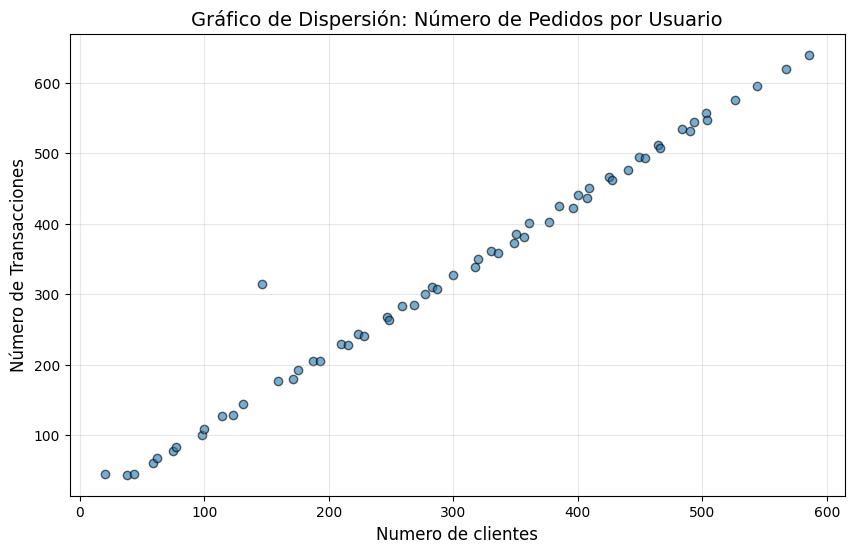

In [100]:
# Crear un DataFrame con el número de pedidos por usuario
pedidos_por_usuario = datos_acumulados.groupby('n_client')['n_transaction'].sum().reset_index()

# Traza un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pedidos_por_usuario['n_client'], pedidos_por_usuario['n_transaction'], alpha=0.6, edgecolor='k')

# Configurar títulos y etiquetas
plt.title('Gráfico de Dispersión: Número de Pedidos por Usuario', fontsize=14)
plt.xlabel('Numero de clientes', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)

# Ajustar diseño
plt.grid(alpha=0.3)
plt.show()


### 6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [108]:
#Calcular la cantidad de pedidos por usuario
ordersByUsers = ordenes.groupby('visitorId', as_index=False).agg({'transactionId': 'count'})
ordersByUsers.columns = ['visitorId', 'orders']

#Calcular los percentiles
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
print()

#Mostrar los resultados
print(f"Percentil 95: {percentiles[0]:.2f}")
print(f"Percentil 99: {percentiles[1]:.2f}")

#Definir puntos de corte para anomalías
anomaly_threshold_95 = percentiles[0]
anomaly_threshold_99 = percentiles[1]

print(f"Usuarios con más de {anomaly_threshold_95} pedidos serán considerados anomalías (95%).")
print(f"Usuarios con más de {anomaly_threshold_99} pedidos serán considerados anomalías extremas (99%).")

#Filtrar usuarios anómalos
anomalous_users = ordersByUsers[ordersByUsers['orders'] > anomaly_threshold_95]
print(f"Número de usuarios anómalos (95%): {len(anomalous_users)}")

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5

Percentil 95: 2.00
Percentil 99: 4.00
Usuarios con más de 2.0 pedidos serán considerados anomalías (95%).
Usuarios con más de 4.0 pedidos serán considerados anomalías extremas (99%).
Número de usuarios anómalos (95%): 30


Percentil 95 (2):
La mayoría de los usuarios (95%) realizan 2 pedidos o menos, lo que indica que los clientes generalmente no realizan pedidos recurrentes en gran cantidad.

Percentil 99 (4):
Los usuarios con más de 4 pedidos son considerados casos extremadamente raros. Estos clientes podrían ser:
Clientes VIP o de alto valor.
Indicadores de patrones de comportamiento que podrían ser estudiados para replicar en otros usuarios

Umbral para anomalías (30):
Los 30 usuarios que tienen más de 2 pedidos representan comportamientos inusuales en comparación con la mayoría de los clientes. Estos usuarios podrían ser:
Clientes altamente comprometidos.
Usuarios con necesidades específicas o recurrentes.
Oportunidades para fidelización, ya que parecen valorar el producto/servicio.

### 7. Traza un gráfico de dispersión de los precios de los pedidos.

In [114]:

print(ordenes.sort_values(by='revenue',ascending=False).head(10))


      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
662      1811671147  4266935830 2019-08-29   1220.2     A
682      1216533772  4266935830 2019-08-29   1220.2     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A


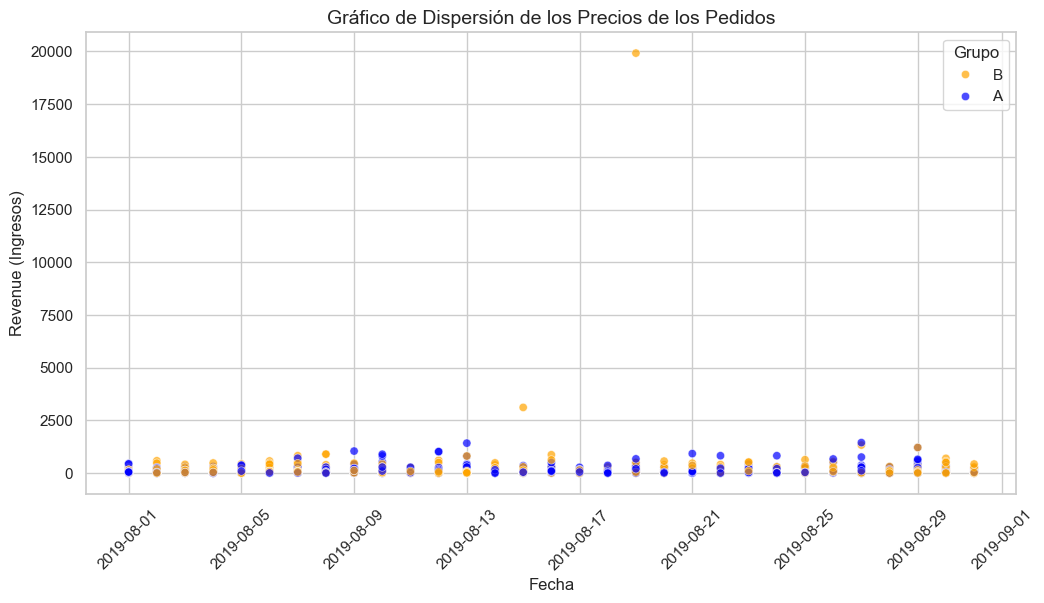

In [117]:
# Configurar el estilo del gráfico
sns.set_theme(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=ordenes,
    x='date',
    y='revenue',
    hue='group',
    palette={'A': 'blue', 'B': 'orange'},
    alpha=0.7
)

# Configurar etiquetas y título
plt.title("Gráfico de Dispersión de los Precios de los Pedidos", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Revenue (Ingresos)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Grupo", loc='upper right')

# Mostrar el gráfico
plt.show()



aqui se muestra una grafica de dispersion de los ingresos de los dias con mayor ingreso y de cada grupo 

### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [124]:
# Calcular los percentiles para los precios de los pedidos
percentiles = np.percentile(ordenes['revenue'], [95, 99])

print(ordenes.sort_values(by='revenue', ascending=False).head(10))
print()

# Mostrar los resultados
print(f"Percentil 95: {percentiles[0]:.2f}")
print(f"Percentil 99: {percentiles[1]:.2f}")

# Definir puntos de corte para anomalías
anomaly_threshold_95 = percentiles[0]
anomaly_threshold_99 = percentiles[1]

print(f"Pedidos con un precio superior a {anomaly_threshold_95} serán considerados anomalías (95%).")
print(f"Pedidos con un precio superior a {anomaly_threshold_99} serán considerados anomalías extremas (99%).")

# Filtrar pedidos anómalos
anomalous_orders = ordenes[ordenes['revenue'] > anomaly_threshold_95]
print(f"Número de pedidos anómalos (95%): {len(anomalous_orders)}")


      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
662      1811671147  4266935830 2019-08-29   1220.2     A
682      1216533772  4266935830 2019-08-29   1220.2     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A

Percentil 95: 435.54
Percentil 99: 900.90
Pedidos con un precio superior a 435.54 serán considerados anomalías (95%).
Pedidos con un precio superior a 900.9039999999999 serán considerados anomalías extremas (99%).
Número de pedidos anómalos (95%): 60


El percentil 95 indica que el 95% de los pedidos tienen un precio igual o inferior a 435.54. Esto significa que los pedidos con un precio mayor a este valor son considerados anómalos.

El percentil 99 indica que el 99% de los pedidos tienen un precio igual o inferior a 900.90. Los pedidos con un precio superior a este valor son considerados anomalías extremas.

Se identificaron 60 pedidos con un precio superior al percentil 95, lo que representa un pequeño porcentaje de las transacciones totales. Estos pedidos tienen precios significativamente más altos que el resto y podrían deberse a:
Clientes comprando grandes cantidades o productos premium.
Promociones o descuentos que impulsaron compras de mayor valor.
Posibles errores en el registro de precios o pedidos.

### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [136]:
ordersByUsersA = (
    ordenes[ordenes['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    ordenes[ordenes['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitantes[visitantes['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitantes[visitantes['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

p_value = (stats.mannwhitneyu(sampleA, sampleB)[1])
relative_difference = sampleB.mean() / sampleA.mean() - 1

print(f"Prueba estadística de Mann-Whitney: {p_value:.5f}")
print(f"Diferencia relativa en las tasas de conversión: {relative_difference:.3f}")

Prueba estadística de Mann-Whitney: 0.01679
Diferencia relativa en las tasas de conversión: 0.138


Resultados:


Prueba estadística de Mann-Whitney: 0.01679
Este valor corresponde al p-valor de la prueba estadística de Mann-Whitney, que evalúa si hay una diferencia significativa entre las distribuciones de los grupos A y B en términos de conversión.


Como el p-valor es 0.01679, que es menor a 0.05, se concluye que la diferencia entre las tasas de conversión de los grupos A y B es estadísticamente significativa. Esto implica que las diferencias observadas no son producto del azar.
Diferencia relativa en las tasas de conversión: 0.138
Este valor indica que la tasa de conversión del grupo B es 13.8% mayor que la del grupo A. Es una mejora considerable, y refleja que las estrategias aplicadas en el grupo B parecen tener un impacto positivo.

Conclusión:
El grupo B está superando al grupo A en términos de conversión, y esta diferencia es significativa. Esto sugiere que cualquier cambio o estrategia aplicada al grupo B podría estar funcionando mejor que lo que se aplicó al grupo A. Se recomienda investigar más a fondo qué factores específicos influyen en esta mejora para poder optimizar la conversión en general.

### 10.Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [141]:
promedio_grupos = stats.mannwhitneyu(ordenes[ordenes['group'] == 'A']['revenue'],ordenes[ordenes['group'] == 'B']['revenue'],)[1]

revenue_relative = ordenes[ordenes['group'] == 'B']['revenue'].mean()/ ordenes[ordenes['group'] == 'A']['revenue'].mean()- 1


print(f"Valor p para comparar los tamaños de pedido promedio de los grupos: {promedio_grupos:.3f}")
print(f"Ganancia Relativa: {revenue_relative:.3f}")

Valor p para comparar los tamaños de pedido promedio de los grupos: 0.692
Ganancia Relativa: 0.252


1. Valor p (0.692):
Un valor p de 0.692 indica que no hay una diferencia estadísticamente significativa entre los tamaños promedio de pedido de los grupos A y B.
Esto significa que cualquier diferencia observada en los tamaños de pedido promedio podría ser atribuida al azar, y no a un efecto real de las condiciones o estrategias aplicadas en los grupos.

2. Ganancia relativa (0.252):
La ganancia relativa de 0.252 indica que el tamaño promedio de los pedidos en el grupo B es 25.2% mayor que en el grupo A.
Aunque este aumento parece considerable en términos prácticos, el valor p alto sugiere que esta diferencia no es confiable desde un punto de vista estadístico.

Diferencia no significativa: Aunque el grupo B muestra un tamaño promedio de pedido mayor que el grupo A (25.2%), esta diferencia no es estadísticamente significativa. Por lo tanto, no se puede asegurar que el grupo B sea consistentemente mejor en términos de tamaño de pedido promedio.

Recomendación: Podría ser útil recopilar más datos o analizar otros factores que puedan estar influyendo en el tamaño de los pedidos antes de tomar decisiones basadas en estos resultados.



### 11.Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [171]:
ordersByUsersA = (
    ordenes[ordenes['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}) 
)
ordersByUsersA.columns = ['visitorId', 'orders']  

ordersByUsersB = (
    ordenes[ordenes['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})  
)
ordersByUsersB.columns = ['visitorId', 'orders']  

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = ordenes[ordenes['revenue'] > 10000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)



sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitantes[visitantes['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitantes[visitantes['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitantes[visitantes['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(
    "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.01254
0.168


1. Prueba estadística de Mann-Whitney (p-valor): 0.01254
El p-valor de 0.01254 es menor al umbral comúnmente utilizado de 0.05, lo que significa que hay una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B, incluso después de filtrar los datos de usuarios anómalos.

2. Diferencia relativa en las tasas de conversión: 0.168 (16.8%)
Este valor indica que la tasa de conversión del grupo B es un 16.8% mayor en comparación con la del grupo A.

Conclusión:

Después de filtrar usuarios anómalos (aquellos con pedidos excesivos o muy caros), encontramos una diferencia significativa entre los grupos A y B en términos de conversión. El grupo B tiene una tasa de conversión significativamente más alta que el grupo A, con una diferencia relativa del 16.8%. Esto podría ser indicativo de que las estrategias aplicadas al grupo B son más efectivas, aunque es importante considerar otros factores antes de tomar decisiones comerciales definitivas.

### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [172]:
# Filtrar datos para excluir usuarios anómalos
ordersFiltered = ordenes[
    ~ordenes['visitorId'].isin(abnormalUsers)  # Excluir usuarios anómalos
]

# Separar los datos en los dos grupos
revenueA = ordersFiltered[ordersFiltered['group'] == 'A']['revenue']
revenueB = ordersFiltered[ordersFiltered['group'] == 'B']['revenue']

# Prueba estadística de Mann-Whitney para comparar los tamaños promedio de los pedidos entre los grupos
p_value = stats.mannwhitneyu(revenueA, revenueB)[1]

# Calcular la diferencia relativa entre los tamaños promedio de los pedidos
relative_difference = revenueB.mean() / revenueA.mean() - 1

# Imprimir resultados
print("Valor p para la prueba de Mann-Whitney: {0:.5f}".format(p_value))
print("Diferencia relativa en los tamaños promedio de pedidos: {0:.3f}".format(relative_difference))


Valor p para la prueba de Mann-Whitney: 0.66987
Diferencia relativa en los tamaños promedio de pedidos: -0.055


Valor p (0.66987):
Este valor p es mucho mayor que el nivel de significancia típico de 0.05. Por lo tanto, no hay suficiente evidencia estadística para rechazar la hipótesis nula. Esto significa que no hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B.

Diferencia relativa (-0.055):
El tamaño promedio de los pedidos en el grupo B es aproximadamente un 5.5% más bajo que en el grupo A. Sin embargo, esta diferencia no es estadísticamente significativa debido al alto valor p.

### 13.Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 

1. Parar la prueba, considerar a uno de los grupos como líder. 

2. Parar la prueba, concluir que no hay diferencia entre los grupos. 

3. Continuar la prueba.

1. Conversión:
Valor p (0.01254): Hay una diferencia estadísticamente significativa en la conversión entre los grupos (p < 0.05).
Diferencia relativa (16.8%): El grupo B tiene una conversión significativamente mayor que el grupo A.

2. Tamaño promedio de pedidos:
Valor p (0.66987): No hay diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos (p > 0.05).
Diferencia relativa (-5.5%): El tamaño promedio de los pedidos en el grupo B es ligeramente menor, pero esta diferencia no es estadísticamente significativa.

3. Ganancia relativa:
En los análisis previos, el grupo B mostró una ganancia relativa positiva (13.8%), indicando que en general, es más rentable en términos de ingresos totales.

## Decisión:
## Basándonos en estos resultados, se recomienda parar la prueba y considerar al grupo B como líder.

Justificación:

1. Conversión superior en el grupo B: El grupo B tiene una conversión significativamente mayor que el grupo A, lo que implica que más usuarios completan una compra en el grupo B.

2. Tamaño promedio de pedidos: Aunque no hay una diferencia estadísticamente significativa en los tamaños de pedido, el grupo B no muestra una desventaja crítica en este aspecto.

3. Ganancia total: La combinación de una conversión significativamente mayor y un tamaño promedio de pedido comparable (ligeramente menor pero no significativo) resulta en una ganancia relativa positiva para el grupo B.

## Dado que el grupo B es más efectivo en términos de conversión y ganancias totales, se recomienda implementar las estrategias del grupo B como la nueva norma.